In [1]:
import random
from pathlib import Path
import matplotlib.pyplot as plt

from dataset import MnistDataloader

Load MINST dataset

In [2]:
input_path = Path('./data')

training_images_filepath = input_path/'train-images-idx3-ubyte/train-images-idx3-ubyte'
training_labels_filepath = input_path/'train-labels-idx1-ubyte/train-labels-idx1-ubyte'

test_images_filepath = input_path/'t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_filepath = input_path/'t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

In [5]:
mnist_dataloader = MnistDataloader(training_images_filepath, 
                                   training_labels_filepath, 
                                   test_images_filepath, 
                                   test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print(f'x_train shape = {x_train.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'x_test shape  = {x_test.shape}')
print(f'y_test shape  = {y_test.shape}')

x_train shape = (60000, 28, 28)
y_train shape = (60000,)
x_test shape  = (10000, 28, 28)
y_test shape  = (10000,)


Visualize

In [15]:
def show_images(images, titles, num_cols = 5, cmap=plt.cm.gray, side=3):
    
    if len(images) % num_cols == 0:
        num_rows = len(images) // num_cols
    else:
        num_rows = len(images) // num_cols + 1
    
    figsize = (num_cols * side, num_rows * side)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize, sharex=True, sharey=True)
    
    for image, title, ax in zip(images, titles, axes.flatten()):      
        ax.imshow(image, cmap = cmap)
        if title:
            ax.set_title(title, fontsize = 10)
    
    fig.tight_layout()

In [15]:
images_train, titles_train = [], []
images_test,  titles_test  = [], []
for _ in range(0, 10):
    idx = random.randint(0, len(y_train) - 1)
    
    image, label = x_train[idx], y_train[idx]
    
    images_train.append(image)        
    titles_train.append(f"train image [{idx}] = {label}")       

for _ in range(0, 5):
    idx = random.randint(0, len(y_test) - 1)
    
    image, label = x_test[idx], y_test[idx]
    
    images_test.append(image)        
    titles_test.append(f"test image [{idx}] = {label}")    

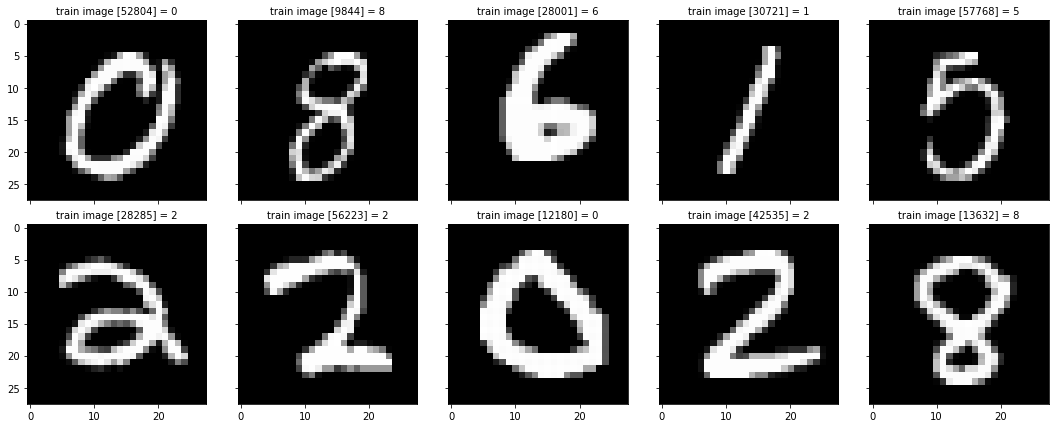

In [16]:
show_images(images_train, titles_train)

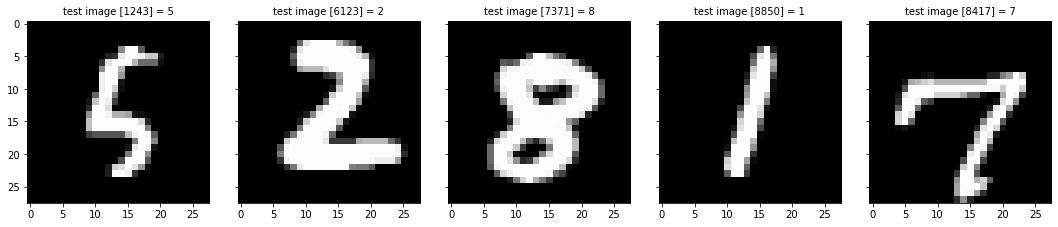

In [17]:
show_images(images_test, titles_test)